In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os



In [22]:
folders = ['PNEUMONIA', 'NORMAL']
sizeofImg = 150
def import_data(img_files):
    itr_data = [] 
    for folder in folders: 
        fold_path = os.path.join(img_files, folder)
        fold_no = folders.index(folder)
        for imgages in os.listdir(fold_path):
            try:
                itr_img = cv2.imread(os.path.join(fold_path, imgages), cv2.IMREAD_GRAYSCALE)
                itr_resized = cv2.resize(itr_img, (sizeofImg, sizeofImg))
                itr_data.append([itr_resized, fold_no])
            except Exception as e:
                print(e)
    return np.array(itr_data)

In [5]:
test_data = import_data('C:/Users/ramna/DataScience/CourseWork/ANN/test')
train_data = import_data('C:/Users/ramna/DataScience/CourseWork/ANN/train')
val_data = import_data('C:/Users/ramna/DataScience/CourseWork/ANN/val')

C:\Program Files (x86)\Anaconda\lib\site-packages\ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


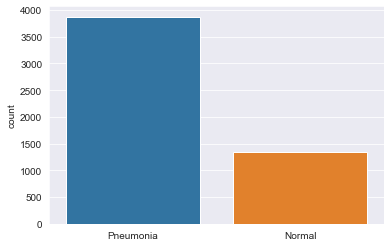

In [6]:
display_data = []
for i_itr in train_data:
    if(i_itr[1] == 0):
        display_data.append("Pneumonia")
    else:
        display_data.append("Normal")
sns.set_style('darkgrid')
sns.countplot(display_data)

Text(0.5, 1.0, 'NORMAL')

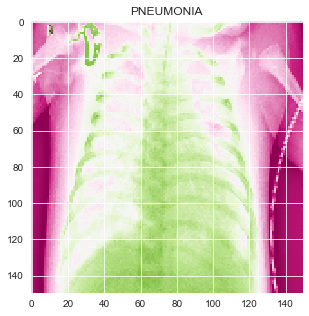

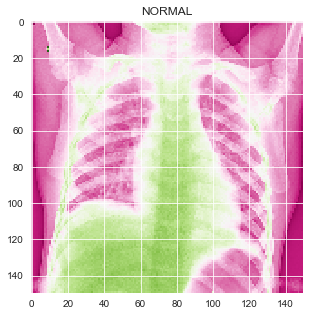

In [7]:
plt.figure(figsize = (5,5))
plt.imshow(train_data[0][0], cmap='PiYG')
plt.title(folders[train_data[0][1]])

plt.figure(figsize = (5,5))
plt.imshow(train_data[-1][0], cmap='PiYG')
plt.title(folders[train_data[-1][1]])

In [8]:
x_train = []
y_train = []

x_val = []
y_val = []

x_test = []
y_test = []

for fea, folder in train_data:
    x_train.append(fea)
    y_train.append(folder)

for fea, folder in test_data:
    x_test.append(fea)
    y_test.append(folder)
    
for fea, folder in val_data:
    x_val.append(fea)
    y_val.append(folder)

In [9]:
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test = np.array(x_test) / 255

In [10]:
x_train = x_train.reshape(-1, sizeofImg, sizeofImg, 1)
y_train = np.array(y_train)

x_val = x_val.reshape(-1, sizeofImg, sizeofImg, 1)
y_val = np.array(y_val)

x_test = x_test.reshape(-1, sizeofImg, sizeofImg, 1)
y_test = np.array(y_test)

In [11]:
img_gen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


img_gen.fit(x_train)

In [12]:
model = Sequential()
model.add(Conv2D(32 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (150,150,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.1))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(64 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 1 , activation = 'sigmoid'))
model.compile(optimizer = "rmsprop" , loss = 'binary_crossentropy' , metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      320       
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 64)        0

In [13]:
learning_rate = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.3, min_lr=0.000001)

cnnModel = model.fit(img_gen.flow(x_train,y_train, batch_size = 32) ,epochs = 12 , validation_data = img_gen.flow(x_val, y_val) ,callbacks = [learning_rate])

print("Loss - " , model.evaluate(x_test,y_test)[0])
print("Accuracy - " , model.evaluate(x_test,y_test)[1]*100 , "%")

Epoch 1/12
163/163 [==============================] - 530s 3s/step - loss: 1.1563 - accuracy: 0.8034 - val_loss: 32.4838 - val_accuracy: 0.5000
Epoch 2/12
163/163 [==============================] - 487s 3s/step - loss: 0.3176 - accuracy: 0.8764 - val_loss: 36.9497 - val_accuracy: 0.5000
Epoch 3/12
163/163 [==============================] - 542s 3s/step - loss: 0.2435 - accuracy: 0.9090 - val_loss: 38.3551 - val_accuracy: 0.5000

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 4/12
163/163 [==============================] - 484s 3s/step - loss: 0.1808 - accuracy: 0.9416 - val_loss: 9.6229 - val_accuracy: 0.5000
Epoch 5/12
163/163 [==============================] - 555s 3s/step - loss: 0.1585 - accuracy: 0.9568 - val_loss: 14.7708 - val_accuracy: 0.5000

Epoch 00005: ReduceLROnPlateau reducing learning rate to 9.000000427477062e-05.
Epoch 6/12
163/163 [==============================] - 472s 3s/step - loss: 0.1388 - accuracy: 0.9578 - val_loss: 0.4831

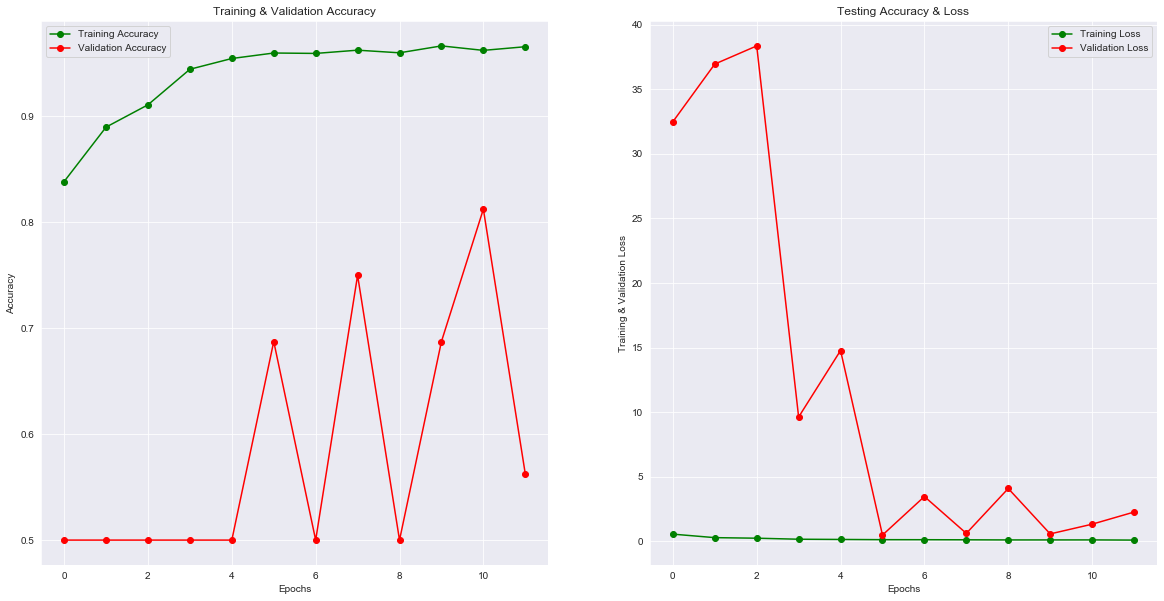

In [14]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
trainAcc = cnnModel.history['accuracy']
trainLoss = cnnModel.history['loss']
valAcc = cnnModel.history['val_accuracy']
valLoss = cnnModel.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , trainAcc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , valAcc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , trainLoss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , valLoss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

In [15]:
pred = model.predict_classes(x_test)
pred = pred.reshape(1,-1)[0]
pred[:15]

C:\Program Files (x86)\Anaconda\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
print(classification_report(y_test, pred, target_names = ['Pneumonia (Class 0)','Normal (Class 1)']))

                     precision    recall  f1-score   support

Pneumonia (Class 0)       0.90      0.97      0.93       390
   Normal (Class 1)       0.95      0.81      0.87       234

           accuracy                           0.91       624
          macro avg       0.92      0.89      0.90       624
       weighted avg       0.91      0.91      0.91       624



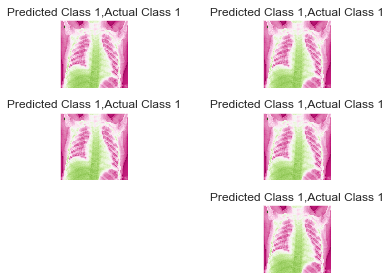

In [26]:
i = 0
for c in correct[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="PiYG", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(pred[c], y_test[c]))
    plt.tight_layout()
    i += 1

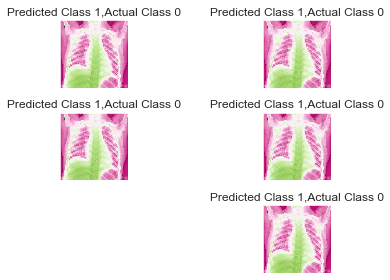

In [32]:
i = 0
for c in incorrect[:6]:
    plt.subplot(3,2,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_test[c].reshape(150,150), cmap="PiYG", interpolation='none')
    plt.title("Predicted Class {},Actual Class {}".format(pred[c], y_test[c]))
    plt.tight_layout()
    i += 1

In [20]:
    def AlexNet(input_shape):
    
    X_input = Input(input_shape)
    
    X = Conv2D(96,(11,11),strides = 4,name="conv0")(X_input)
    X = BatchNormalization(axis = 3 , name = "bn0")(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max0')(X)
    
    X = Conv2D(256,(5,5),padding = 'same' , name = 'conv1')(X)
    X = BatchNormalization(axis = 3 ,name='bn1')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max1')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv2')(X)
    X = BatchNormalization(axis = 3, name = 'bn2')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(384, (3,3) , padding = 'same' , name='conv3')(X)
    X = BatchNormalization(axis = 3, name = 'bn3')(X)
    X = Activation('relu')(X)
    
    X = Conv2D(256, (3,3) , padding = 'same' , name='conv4')(X)
    X = BatchNormalization(axis = 3, name = 'bn4')(X)
    X = Activation('relu')(X)
    
    X = MaxPooling2D((3,3),strides = 2,name = 'max2')(X)
    
    X = Flatten()(X)
    
    X = Dense(4096, activation = 'relu', name = "fc0")(X)
    
    X = Dense(4096, activation = 'relu', name = 'fc1')(X) 
    
    X = Dense(6,activation='softmax',name = 'fc2')(X)
    
    model = Model(inputs = X_input, outputs = X, name='AlexNet')
return model

alex = AlexNet(x_train[0][0].shape[1:])

IndentationError: expected an indented block (<ipython-input-20-0ee24e90f079>, line 3)

NameError: name 'AlexNet' is not defined